# Analysis of distances between interacting digests

## Description of the analysis

In this notebook, we use the script [```diachrscripts/analyze_interaction_distances_script.py```](https://github.com/TheJacksonLaboratory/diachrscripts/blob/master/analyze_interaction_distances_script.py) in order to analyse the distances between interacting digests for simple, twisted, undirected and indefinable interactions. The distance between digests is defined as the distance between the inner ends of two cis interacting digests. Interactions with a distance of less than 10,000 bp are excluded from this analysis.

The categories simple, twisted, undirected and indefinable are defined using a binomial distribution. Let ```ks``` and ```kt``` the numbers of simple and twisted read pairs of a given interaction. An interaction is defined to be *simple*, if ```1 - binom.cdf(k = kt-1, n = ks + kt, p = 0.5) <= 0.05``` and ```ks < kt```. Otherwise, if ```1 - binom.cdf(k = ks-1, n = ks + kt, p = 0.5) <= 0.05``` and ```kt < ks``` the interaction is defined to be *twisted*. All remaining interactions are defined to be *undirected*, if ```4 < kt + ks```, or indefinable, if ```kt + ks < 5```.

This analysis can be restricted to particular subsets of interactions depending on the status of interacting digest using the ```STATUS_PAIR_FLAG```. The default is ```ALL```. ```AA```, for instance, can be used to restrict the analysis to interactions between digests that were selected for enrichment.

## Choose dataset

We analyzed four datasets, three capture Hi-C (Mifsud 2015, Schoenfelder 2015, Chesi 2019) and one Hi-C dataset (Nora 2017). In this section, individual datasets can be selected for the analysis that can be performed in the third section of this notebook.

### Mifsud 2015 (Promoter capture Hi-C, GM12878 and CD34+ blood cells, hg38, HindIII)

In [15]:
# Create output directory
!mkdir -p ../results/mifsud/digest_distance

#### Replicate 1

In [97]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R10.interaction.counts.table.gt1.tsv.gz"
P_VALUE_CUTOFF = 0.003

#### Replicate 2

In [102]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R20.interaction.counts.table.gt1.tsv.gz"
P_VALUE_CUTOFF = 0.003

#### Replicate 3

In [47]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R30.interaction.counts.table.gt1.tsv.gz"
P_VALUE_CUTOFF = "NA"

#### Interactions in at least two replicates

In [ ]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/mifsud_2015_hg38/data/gzdir/MIFSUD_R30.interaction.counts.table.gt1.tsv.gz"

### Schoenfelder 2015 (Promoter capture Hi-C, mES cells, mm10, HindIII)

In [2]:
# Create output directory
!mkdir -p ../results/schoenefelder/digest_distance

#### Replicate 1

In [81]:
OUT_PREFIX = "../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R10.interaction.counts.table.gt1.tsv.gz"
P_VALUE_CUTOFF = "NA"

#### Replicate 2

In [107]:
OUT_PREFIX = "../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/schoenefelder_2015_mm10/data/gzdir/SCHOEN_R20.interaction.counts.table.gt1.tsv.gz"
P_VALUE_CUTOFF = 0.0015

#### Interactions in at least two replicates (Schönefelder)

In [53]:
OUT_PREFIX = "../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../schoenefelder_interactions.txt.gz"

### Chesi 2019 (Promoter Capture-C, BMP2 induced osteoblasts and HepG2 cells, hg38, DpnII)

In [10]:
# Create output directory
!mkdir -p ../results/chesi/digest_distance

#### Replicate 1 - BMP2

In [94]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_bmp2/CHESI_BMP2_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - BMP2

In [100]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_bmp2/CHESI_BMP2_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3 - BMP2

In [113]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_bmp2/CHESI_BMP2_R30.interaction.counts.table.gt1.tsv.gz"

#### Replicate 1 - HEPG2

In [119]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_r1"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_hepg2/CHESI_HEPG2_R10.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - HEPG2

In [126]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_r2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_hepg2/CHESI_HEPG2_R20.interaction.counts.table.gt1.tsv.gz"

#### Replicate 3 - HEPG2

In [132]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_r3"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/chesi_2019_hg38/data/gzdir_hepg2/CHESI_HEPG2_R30.interaction.counts.table.gt1.tsv.gz"

### Nora 2017 (gone boundary bins)

In [138]:
# Create output directory
!mkdir -p ../results/nora/digest_distance

#### Replicate 1 - before CTCF-depletion

In [141]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644945"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644945_bins.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - before CTCF-depletion

In [147]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644946"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644946_bins.interaction.counts.table.gt1.tsv.gz"

#### Replicate 1 - after CTCF-depletion

In [153]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644947"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644947_bins.interaction.counts.table.gt1.tsv.gz"

#### Replicate 2 - after CTCF-depletion

In [159]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_GSM2644948"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../diachrscripts_data/nora_2017_mm9/data/gzdir_bins/GSM2644948_bins.interaction.counts.table.gt1.tsv.gz"

### Interactions in at least two replicates

#### Interactions in at least two replicates (Mifsud)

In [52]:
OUT_PREFIX = "../results/mifsud/digest_distance/digest_distance_analysis_mifsud_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../alt_interactions/mifsud_at_least_in_2_replicates_interactions.tsv.gz"
P_VALUE_CUTOFF = 0.00375 # FDR < 25%

#### Interactions in at least two replicates (Schönefelder)

In [116]:
OUT_PREFIX = "../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../alt_interactions/schoenefelder_at_least_in_2_replicates_interactions.tsv.gz"
P_VALUE_CUTOFF = 0.003 # FDR < 25%

#### Interactions in at least two replicates (Chesi - BMP2)

In [132]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_bmp2_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../alt_interactions/chesi_bmp2_at_least_in_2_replicates_interactions.tsv.gz"
P_VALUE_CUTOFF = 0.00175 # FDR < 25%

#### Interactions in at least two replicates (Chesi - HEPG2)

In [129]:
OUT_PREFIX = "../results/chesi/digest_distance/digest_distance_analysis_chesi_hepg2_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../alt_interactions/chesi_hepg2_at_least_in_2_replicates_interactions.tsv.gz"
P_VALUE_CUTOFF = 0.00175 # FDR < 25%

#### Interactions in at least two replicates (Nora - untreated)

In [27]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_untreated_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../alt_interactions/nora_untreated_at_least_in_2_replicates_interactions.tsv.gz"
P_VALUE_CUTOFF = "NA"

#### Interactions in at least two replicates (Nora - treated)

In [33]:
OUT_PREFIX = "../results/nora/digest_distance/digest_distance_analysis_nora_treated_at_least_2"
STATUS_PAIR_FLAG = "ALL"
INTERACTION_FILE = "../alt_interactions/nora_treated_at_least_in_2_replicates_interactions.tsv.gz"
P_VALUE_CUTOFF = "NA"

## Perform analysis

In [115]:
# Run Python script
!python ../analyze_interaction_distances_script.py --p-value-cutoff $P_VALUE_CUTOFF --out-prefix $OUT_PREFIX --status-pair-flag $STATUS_PAIR_FLAG --interaction-file $INTERACTION_FILE

[INFO] Input parameters
	[INFO] --out-prefix: ../results/schoenefelder/digest_distance/digest_distance_analysis_schoenefelder_at_least_2
	[INFO] --interaction-file: ../alt_interactions/schoenefelder_at_least_in_2_replicates_interactions.tsv.gz
	[INFO] --status-pair-flag: ALL
	[INFO] --p-value-cutoff: 0.003
[INFO] Looking for smallest number of read pairs n that yields a significant P-value with the given threshold of 0.003.
	[INFO] Smallest n: 9 read pairs
[INFO] Determining distribution of n in significant interactions in: ../alt_interactions/schoenefelder_at_least_in_2_replicates_interactions.tsv.gz ...
^C
Traceback (most recent call last):
  File "../analyze_interaction_distances_script.py", line 206, in <module>
    n_dict = dclass.get_n_dict(diachromatic_interaction_file, status_pair_flag, min_digest_dist, p_value_cutoff)
  File "/home/peter/PycharmProjects/diachrscripts/diachrscripts_toolkit.py", line 633, in get_n_dict
    p_val = interaction.get_binomial_p_value()
  File "/home

In [42]:
# Load modules
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [133]:
# Load saved numpy arrays from disk
array_path = OUT_PREFIX + "_distance_array_simple.npy"
distance_array_simple = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_twisted.npy"
distance_array_twisted = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_undirected.npy"
distance_array_undirected = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_undirected_reference.npy"
distance_array_undirected_reference = np.load(array_path)
array_path = OUT_PREFIX + "_distance_array_indefinable.npy"
distance_array_indefinable = np.load(array_path)

# Dertermine interaction numbers
print("Interaction numbers:")
print("\tSimple: " + str(len(distance_array_simple)))
print("\tTwisted: " + str(len(distance_array_twisted)))
print("\tUndirected reference: " + str(len(distance_array_undirected_reference)))
print("\tUndirected all: " + str(len(distance_array_undirected)))
print("\tIndefinable: " + str(len(distance_array_indefinable)))

# Determine mean distances
print("Mean distances:")
print("\tSimple: " + str(int(distance_array_simple.mean())))
print("\tTwisted: " + str(int(distance_array_twisted.mean())))
print("\tUndirected reference: " + str(int(distance_array_undirected_reference.mean())))
print("\tUndirected all: " + str(int(distance_array_undirected.mean())))
print("\tIndefinable: " + str(int(distance_array_indefinable.mean())))

# Determine median distances
print("Median distances:")
print("\tSimple: " + str(int(np.median(distance_array_simple))))
print("\tTwisted: " + str(int(np.median(distance_array_twisted))))
print("\tUndirected reference: " + str(int(np.median(distance_array_undirected_reference))))
print("\tUndirected all: " + str(int(np.median(distance_array_undirected))))
print("\tIndefinable: " + str(int(np.median(distance_array_indefinable))))

# Perform t-tests
print(" t-tests:")

res = stats.median_test(distance_array_simple, distance_array_twisted)
print("\tSimple vs. Twisted: " + str(res))

res = stats.median_test(distance_array_simple, distance_array_undirected)
print("\tSimple vs. Undirected: " + str(res))

#res = stats.median_test(distance_array_simple, distance_array_indefinable)
#print("\tSimple vs. Indefinable: " + str(res))

res = stats.median_test(distance_array_twisted, distance_array_undirected)
print("\tTwisted vs. Undirected: " + str(res))

res = stats.median_test(distance_array_simple, distance_array_undirected_reference)
print("\tSimple vs. Undirected reference: " + str(res))

res = stats.median_test(distance_array_twisted, distance_array_undirected_reference)
#stats.wilcoxon(distance_array_twisted, distance_array_undirected_reference)
print("\tTwisted vs. Undirected reference: " + str(res))

#res = stats.median_test(distance_array_twisted, distance_array_indefinable)
#print("\tTwisted vs. Indefinable: " + str(res))

#res = stats.median_test(distance_array_undirected, distance_array_indefinable)
#print("\tUndirected vs. Indefinable: " + str(res))


Interaction numbers:
	Simple: 177
	Twisted: 178
	Undirected reference: 348
	Undirected all: 59419
	Indefinable: 1939942
Mean distances:
	Simple: 715908
	Twisted: 3275033
	Undirected reference: 55374
	Undirected all: 64971
	Indefinable: 146895
Median distances:
	Simple: 35142
	Twisted: 36804
	Undirected reference: 34751
	Undirected all: 37992
	Indefinable: 81909
 t-tests:
	Simple vs. Twisted: (0.634050949524056, 0.4258732808622263, 35726.0, array([[84, 93],
       [93, 85]]))
	Simple vs. Undirected: (1.835961275868787, 0.1754250490263674, 37982.0, array([[   79, 29719],
       [   98, 29700]]))
	Twisted vs. Undirected: (0.6807013648625299, 0.4093453162599582, 37985.0, array([[   83, 29714],
       [   95, 29705]]))
	Simple vs. Undirected reference: (0.0465563460291653, 0.8291676605936597, 34819.0, array([[ 90, 172],
       [ 87, 176]]))
	Twisted vs. Undirected reference: (0.4160854965775539, 0.518896796449843, 35204.0, array([[ 93, 170],
       [ 85, 178]]))


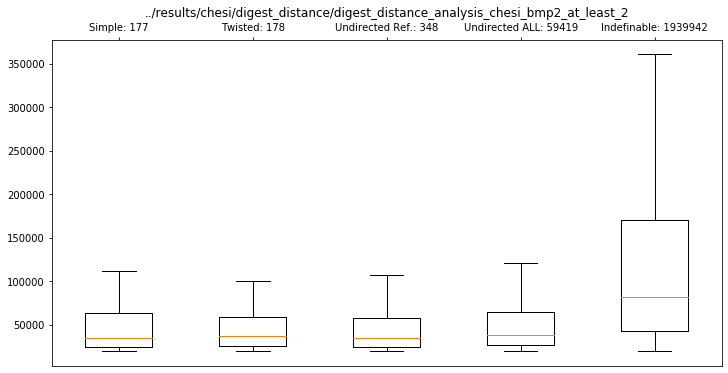

In [134]:
# Create boxplot for simple, twisted, undirected and indefinable

# Combine arrays into a list    
data_to_plot = [distance_array_simple, distance_array_twisted, distance_array_undirected_reference, distance_array_undirected, distance_array_indefinable]

# Create a figure instance
fig = plt.figure(1, figsize=(12, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)

# Add interaction numbers to boxplot
ax.xaxis.tick_top()
plt.xticks([1, 2, 3, 4, 5], ["Simple: " + str(len(distance_array_simple)), "Twisted: " + str(len(distance_array_twisted)), "Undirected Ref.: " + str(len(distance_array_undirected_reference)), "Undirected ALL: " + str(len(distance_array_undirected)), "Indefinable: " + str(len(distance_array_indefinable))])

# Save the figure
plt.title(OUT_PREFIX)
figure_name = OUT_PREFIX + "_boxplot_1.pdf"
fig.savefig(figure_name, bbox_inches='tight', format = "pdf")




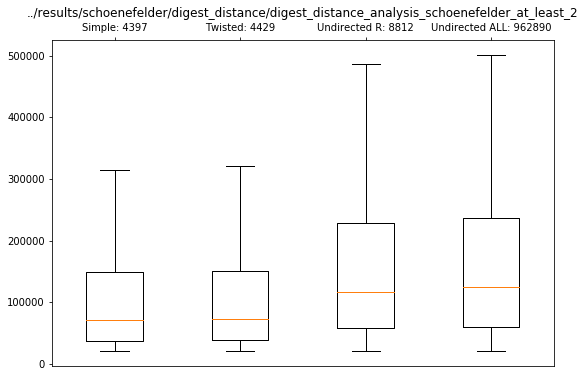

In [46]:
# Create boxplot for simple, twisted, undirected only

# Combine these different collections into a list    
data_to_plot = [distance_array_simple, distance_array_twisted, distance_array_undirected_reference, distance_array_undirected]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)

# Add interaction numbers to boxplot
ax.xaxis.tick_top()
plt.xticks([1, 2, 3, 4], ["Simple: " + str(len(distance_array_simple)), "Twisted: " + str(len(distance_array_twisted)), "Undirected R: " + str(len(distance_array_undirected_reference)), "Undirected ALL: " + str(len(distance_array_undirected))])



# Save the figure
plt.title(OUT_PREFIX)
figure_name = OUT_PREFIX + "_boxplot_2.pdf"
fig.savefig(figure_name, bbox_inches='tight', format = "pdf")

4397
4429
8794
8812
1313916


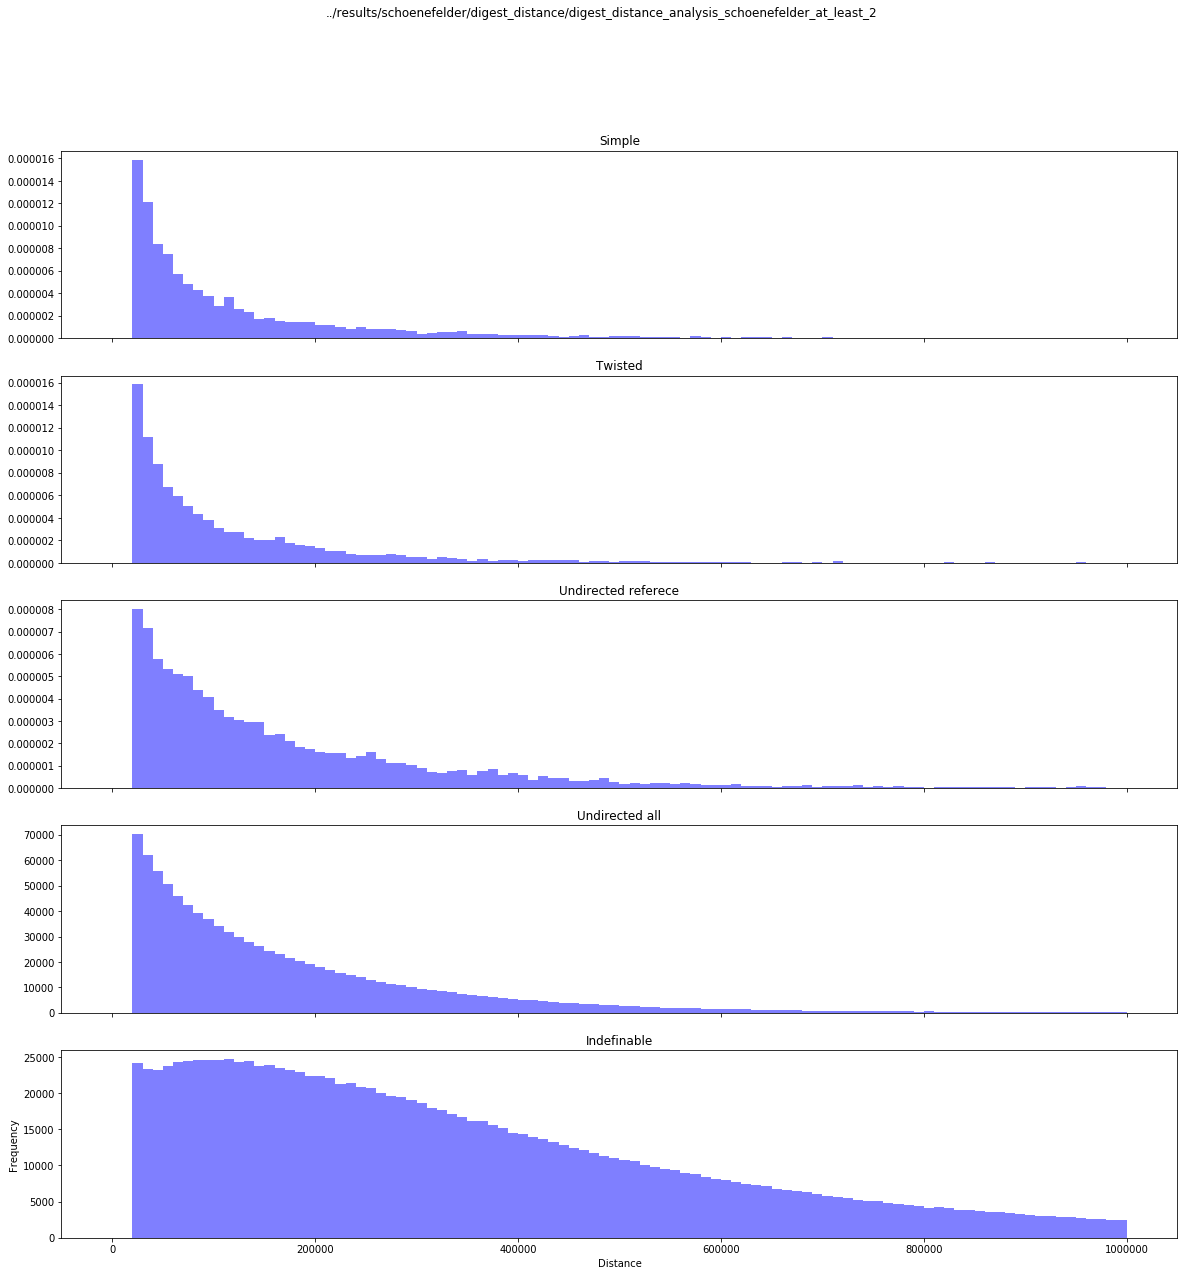

In [122]:
# Create distance histograms
plt.rcParams['figure.figsize'] = [20, 20]
num_bins = 100
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True, sharey=False)
f.canvas.set_window_title('Distances between interacting digests')
plt.title(OUT_PREFIX)
plt.xlabel("Distance")
plt.ylabel("Frequency")
x_max=1000000

distance_array_directed = np.concatenate((distance_array_simple,distance_array_simple))

distance_array_simple

ax1.set_title("Simple")
n, bins, patches = ax1.hist(distance_array_simple, num_bins, facecolor='blue', alpha=0.5, range=(0,x_max), density=True)

ax2.set_title("Twisted")
n, bins, patches = ax2.hist(distance_array_twisted, num_bins, facecolor='blue', alpha=0.5, range=(0,x_max), density=True)

ax3.set_title("Undirected referece")
n, bins, patches = ax3.hist(distance_array_undirected_reference, num_bins, facecolor='blue', alpha=0.5, range=(0,x_max), density=True)

ax4.set_title("Undirected all")
n, bins, patches = ax4.hist(distance_array_undirected, num_bins, facecolor='blue', alpha=0.5, range=(0,x_max))

ax5.set_title("Indefinable")
n, bins, patches = ax5.hist(distance_array_indefinable, num_bins, facecolor='blue', alpha=0.5, range=(0,x_max))

# Save the figure
f.suptitle(OUT_PREFIX)
figure_name = OUT_PREFIX + "_histogram.pdf"
f.savefig(figure_name, bbox_inches='tight', format = "pdf")

print(len(distance_array_simple))
print(len(distance_array_twisted))
print(len(distance_array_directed))
print(len(distance_array_undirected_reference))
print(len(distance_array_indefinable))

